In [1]:
import wheel
import numpy as np
import sklearn as skl
from mat4py import loadmat
import scipy.io
import csv
import struct
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
#from mne_bids import BIDSPath, read_raw_bids
from scipy import stats
from scipy.signal import butter, filtfilt,welch
from scipy.stats import zscore 
#from mne.time_frequency import tfr_multitaper
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import tkinter as tk
import seaborn as sns
import statsmodels.api as sm
from tqdm import tqdm

#import mne
#from mne.viz import plot_alignment, snapshot_brain_montage
#import mne_bids
#from mne.channels import make_standard_montage

from sklearn.model_selection import train_test_split
import pickle
import os
import dask
import dask.dataframe as dd
import statsmodels.api as sm


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from matplotlib import colormaps
from mne_bids import BIDSPath, read_raw_bids
from scipy.signal import butter, filtfilt
from mne.time_frequency import tfr_multitaper
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import tkinter as tk



import mne
from mne.viz import plot_alignment, snapshot_brain_montage
import mne_bids
from mne.channels import make_standard_montage
from mne.datasets import fetch_fsaverage
from mne.surface import get_meg_helmet_surf

In [4]:
import pandas as pd

In [5]:
import warnings
warnings.filterwarnings('once')

In [6]:
s14_glm = pd.read_csv('/Users/klab/S14_GLM.csv.gz')

In [7]:
s14_glm = s14_glm[['Electrode', 'R-squared']]

In [8]:
s14_glm.dropna(inplace = True)

In [9]:
s14_glm['R-squared'].isna().sum()

0

In [10]:
s14_glm['R-squared'].dtypes

dtype('float64')

In [11]:
s14_glm

,Electrode,R-squared
0,1,0.213177
1,4,0.126774
2,6,0.890310
3,8,0.628641
4,9,0.688041
...,...,...
108,155,-0.232720
109,156,-0.297728
110,157,0.676739
111,159,0.513606


In [12]:
if 'brain' in locals():
    brain.close() 
plt.close('all')

In [13]:
s14_glm['Electrode']

0        1
1        4
2        6
3        8
4        9
      ... 
108    155
109    156
110    157
111    159
112    160
Name: Electrode, Length: 113, dtype: int64

In [14]:
elec_path = "/Volumes/Expansion/4WT/COLLAB-CODE/Alliyah/Sub-Mat-Converted/elecFinal.mat"
elec_raw = scipy.io.loadmat(elec_path, squeeze_me=True, simplify_cells=True, struct_as_record=False)
elec_frame = pd.DataFrame(elec_raw['elec_out'])
subject_data = elec_frame[(elec_frame['subjectNum'] == 14) & 
                          (elec_frame['isRejectFSL'] != 1) & 
                          (elec_frame['isRejectManual'] != 1)]

In [15]:
subject_data

,subjectNum,elecNum,isRejectManual,parcLabel,ctxParc,wmParc,isRejectFSL_2wm,isRejectFSL,isWM,unknown_wmParc,groupLabels,isLeft,groupAvgCoords
1222,14,1,0,Amygdala,Left-Amygdala,unknown,0,0,0,1,A1 s14 e1,1,"[-20.66945520855748, -7.462862992363426, -20.6..."
1223,14,2,0,Amygdala,Left-Amygdala,unknown,0,0,0,1,A2 s14 e2,1,"[-25.570836211066336, -7.854196984958605, -21...."
1224,14,3,0,Amygdala,Left-Amygdala,unknown,0,0,0,1,A3 s14 e3,1,"[-31.603781208333885, -7.637026966307474, -21...."
1225,14,4,0,Amygdala,Left-Amygdala,unknown,0,0,0,1,A4 s14 e4,1,"[-36.46764970849537, -7.745825955144568, -21.5..."
1226,14,6,0,G_temporal_middle,Left-Cerebral-White-Matter,G_temporal_middle,0,0,1,0,A6 s14 e6,1,"[-46.49703395868164, -7.952565431886228, -22.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,14,203,0,S_front_inf,ctx_lh_S_front_inf,S_front_inf,0,0,0,0,Z11 s14 e203,1,"[-40.69156632624066, 31.526001819726673, 18.44..."
1335,14,204,0,S_front_inf,Left-Cerebral-White-Matter,S_front_inf,0,0,1,0,Z12 s14 e204,1,"[-40.79009475138574, 35.48510508820647, 21.515..."
1336,14,205,0,G_front_middle,Left-Cerebral-White-Matter,G_front_middle,0,0,1,0,Z13 s14 e205,1,"[-40.888510020131434, 39.444147506285105, 24.5..."
1337,14,206,0,G_front_middle,ctx_lh_G_front_middle,G_front_middle,0,0,0,0,Z14 s14 e206,1,"[-40.986925288877046, 43.40318992436377, 27.65..."


In [16]:

# Import Subject Files
Subject = "S14"
Sub_num = 14
Gen_Path = "/Volumes/Expansion/4WT/COLLAB-CODE/Alliyah/Sub-Mat-Converted/"+Subject+"/"
record_direc = "s14_ccf_SANN007"
subjects_dir = '/Volumes/Expansion/4WT/4WT-analysis/DATA'


if 'brain' in locals():
    brain.close() 
plt.close('all')


# Create lists for electrode positions and R-squared values
elec_pos = []
r_squared_values = []

for idx, row in subject_data.iterrows():
    coords = list([float(coord) for coord in row['groupAvgCoords']])
    elec_pos.append(coords)
    elec_num = row['elecNum']+1
    if elec_num in list(s14_glm['Electrode']):
        r_squared = s14_glm[s14_glm['Electrode'] == elec_num]['R-squared'].values[0]
        r_squared_values.append(r_squared)
    else:
        r_squared_values.append(np.nan)
coordinates = np.array(elec_pos)
r_squared_values = np.array(r_squared_values, dtype=float)  # Ensure float type
print(r_squared_values)


[            nan             nan  1.26774101e-01             nan
             nan  6.28641080e-01  6.88040669e-01  1.31851581e-01
 -2.22044605e-16  0.00000000e+00 -1.12397972e-01             nan
 -1.40272996e-01  3.80853304e-01             nan             nan
  7.92523661e-01             nan             nan  0.00000000e+00
             nan             nan             nan -7.37494045e-01
  3.91773841e-01  8.25083816e-01             nan             nan
             nan -9.03698503e-02 -2.55671452e-03  1.11022302e-16
 -3.57024678e-02 -7.14657721e-02             nan -8.20568018e-02
  8.83548846e-01  2.17247225e-01 -5.99359626e-02  6.80657793e-01
             nan             nan  5.18332868e-01             nan
             nan -2.07302801e-01 -4.19881721e-01 -7.47682767e-01
  1.80587199e-01  1.98118062e-03  1.09568922e-01  7.61919868e-02
             nan             nan             nan             nan
             nan -9.60795344e-01             nan             nan
             nan         

In [17]:


# Assuming coordinates and r_squared_values are defined earlier in your script
print(f"Number of coordinates: {len(coordinates)}")
print(f"Number of R-squared values: {len(r_squared_values)}")
print(f"R-squared values: {r_squared_values}")

if len(r_squared_values) == 0:
    raise ValueError("No R-squared values found. Check the electrode naming convention and data matching.")

# Create a mask for valid R-squared values
valid_mask = ~np.isnan(r_squared_values)
valid_r_squared = r_squared_values[valid_mask]

if len(valid_r_squared) == 0:
    raise ValueError("No valid R-squared values found after removing NaNs.")

# Normalize R-squared values for color mapping (only for valid values)
min_r_squared = np.min(valid_r_squared)
max_r_squared = np.max(valid_r_squared)

if min_r_squared == max_r_squared:
    print("Warning: All valid R-squared values are the same. Using a uniform color.")
    normalized_r_squared = np.zeros_like(r_squared_values)
else:
    normalized_r_squared = (r_squared_values - min_r_squared) / (max_r_squared - min_r_squared)

# Setup brain visualization
subjects_dir = mne.datasets.sample.data_path() / "subjects"
fetch_fsaverage(subjects_dir=subjects_dir, verbose=True)

# Create a custom colormap (blue to red)
colors = ['darkblue', 'blue', 'lightblue', 'white', 'mistyrose', 'red', 'darkred']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Create the brain visualization with parcellation (left hemisphere only)
brain = mne.viz.Brain("fsaverage", hemi='lh', surf='pial', subjects_dir=subjects_dir, 
                      background='white', cortex='low_contrast', alpha=0.3)

# Add parcellation with increased transparency

atlas = 'aparc'
labels = mne.read_labels_from_annot('fsaverage', atlas, hemi='lh', subjects_dir=subjects_dir)
for label in labels:
    if label.name != 'unknown':
        color = np.random.rand(3)  # Random color for each region
        brain.add_label(label, color=color, alpha=0.4)

# Set the view
view_kwargs = dict(azimuth=135, elevation=90, focalpoint=(0, 0, -15))
brain.show_view(distance=400, **view_kwargs)

# Add foci with color based on R-squared values
for coord, r_squared in zip(coordinates, normalized_r_squared):
    if np.isnan(r_squared):
        color = 'gray'  # Use gray for electrodes without R-squared values
    else:
        color = cmap(r_squared)  # Use custom colormap for valid values
    brain.add_foci(coord, coords_as_verts=False, hemi='lh', color=color, scale_factor=0.25)

# Display the brain model
brain.show()

brain.save_image('brain_visualization.png')

# Add color bar in a separate figure
if len(valid_r_squared) > 0:
    fig, ax = plt.subplots(figsize=(8, 1))
    fig.subplots_adjust(bottom=0.5)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_r_squared, vmax=max_r_squared))
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=ax, orientation='horizontal', label='R-squared')
    plt.title('R-squared Values')
    plt.savefig('colorbar.png', dpi=300, bbox_inches='tight')
    plt.close()

# Create a legend for brain regions
legend_labels = [label.name for label in labels if label.name != 'unknown']
legend_colors = [label.color for label in labels if label.name != 'unknown']
fig, ax = plt.subplots(figsize=(10, len(legend_labels) * 0.25))
ax.set_title('Brain Regions')
for i, (label, color) in enumerate(zip(legend_labels, legend_colors)):
    ax.bar(0, 1, color=color, label=label)
ax.set_yticks([])
ax.set_xticks([])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('brain_regions_legend.png', dpi=300, bbox_inches='tight')
plt.close()

Number of coordinates: 99
Number of R-squared values: 99
R-squared values: [            nan             nan  1.26774101e-01             nan
             nan  6.28641080e-01  6.88040669e-01  1.31851581e-01
 -2.22044605e-16  0.00000000e+00 -1.12397972e-01             nan
 -1.40272996e-01  3.80853304e-01             nan             nan
  7.92523661e-01             nan             nan  0.00000000e+00
             nan             nan             nan -7.37494045e-01
  3.91773841e-01  8.25083816e-01             nan             nan
             nan -9.03698503e-02 -2.55671452e-03  1.11022302e-16
 -3.57024678e-02 -7.14657721e-02             nan -8.20568018e-02
  8.83548846e-01  2.17247225e-01 -5.99359626e-02  6.80657793e-01
             nan             nan  5.18332868e-01             nan
             nan -2.07302801e-01 -4.19881721e-01 -7.47682767e-01
  1.80587199e-01  1.98118062e-03  1.09568922e-01  7.61919868e-02
             nan             nan             nan             nan
             na

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/wslink/backends/aiohttp/__init__.py:95: NotAppKeyWarning: It is recommended to use web.AppKey instances for keys.
https://docs.aiohttp.org/en/stable/web_advanced.html#application-s-config
  self.app["state"] = {}


Reading labels from parcellation...
   read 35 labels from /Users/klab/mne_data/MNE-sample-data/subjects/fsaverage/label/lh.aparc.annot


A view with name (P_0x13f6206b0_0) is already registered
 => returning previous one


In [18]:
#Now do some modality electrode analysis
#2,14,21,53,90,110

In [19]:
sig_a_v_list = [2,14,21,53,90,110] 

In [20]:
sig_a = [2,53,110]

In [21]:
sig_v = [14,21,90]

In [22]:
elecs = list(subject_data['elecNum'])

In [23]:
elecs

[1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 26,
 27,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 58,
 59,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 73,
 74,
 75,
 76,
 77,
 78,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 106,
 107,
 108,
 111,
 112,
 113,
 114,
 116,
 118,
 119,
 132,
 133,
 135,
 136,
 137,
 138,
 139,
 140,
 161,
 162,
 163,
 186,
 187,
 188,
 189,
 190,
 191,
 202,
 203,
 204,
 205,
 206,
 207]

In [24]:
subject_data_audio= elec_frame[(elec_frame['elecNum'].isin(sig_a)) & (elec_frame['subjectNum'] == 14)]

In [25]:
subject_data_audio

,subjectNum,elecNum,isRejectManual,parcLabel,ctxParc,wmParc,isRejectFSL_2wm,isRejectFSL,isWM,unknown_wmParc,groupLabels,isLeft,groupAvgCoords
1223,14,2,0,Amygdala,Left-Amygdala,unknown,0,0,0,1,A2 s14 e2,1,"[-25.570836211066336, -7.854196984958605, -21...."


In [26]:
subject_data_vis= elec_frame[(elec_frame['elecNum'].isin(sig_v)) & (elec_frame['subjectNum'] ==14)]

In [27]:
subject_data_vis

,subjectNum,elecNum,isRejectManual,parcLabel,ctxParc,wmParc,isRejectFSL_2wm,isRejectFSL,isWM,unknown_wmParc,groupLabels,isLeft,groupAvgCoords
1233,14,14,0,Hippocampus,Left-Hippocampus,unknown,0,0,0,1,B2 s14 e14,1,"[-29.727203175657536, -28.33407505958796, -13...."
1239,14,21,0,S_temporal_inf,Left-Cerebral-White-Matter,S_temporal_inf,0,0,1,0,B9 s14 e21,1,"[-62.48198616860353, -29.32200597819488, -13.5..."
1290,14,90,0,S_precentral-inf-part,Left-Cerebral-White-Matter,S_precentral-inf-part,0,0,1,0,K10 s14 e90,1,"[-45.44337344843572, -1.3209763427650074, 35.7..."


In [28]:
atlas = 'aparc'
label_list = [] 
labels = mne.read_labels_from_annot('fsaverage', atlas, hemi='lh', subjects_dir=subjects_dir)
for label in labels:
    if label.name != 'unknown':
        label_list.append(label.name)
        

Reading labels from parcellation...
   read 35 labels from /Users/klab/mne_data/MNE-sample-data/subjects/fsaverage/label/lh.aparc.annot


In [29]:
label_list

['bankssts-lh',
 'caudalanteriorcingulate-lh',
 'caudalmiddlefrontal-lh',
 'cuneus-lh',
 'entorhinal-lh',
 'frontalpole-lh',
 'fusiform-lh',
 'inferiorparietal-lh',
 'inferiortemporal-lh',
 'insula-lh',
 'isthmuscingulate-lh',
 'lateraloccipital-lh',
 'lateralorbitofrontal-lh',
 'lingual-lh',
 'medialorbitofrontal-lh',
 'middletemporal-lh',
 'paracentral-lh',
 'parahippocampal-lh',
 'parsopercularis-lh',
 'parsorbitalis-lh',
 'parstriangularis-lh',
 'pericalcarine-lh',
 'postcentral-lh',
 'posteriorcingulate-lh',
 'precentral-lh',
 'precuneus-lh',
 'rostralanteriorcingulate-lh',
 'rostralmiddlefrontal-lh',
 'superiorfrontal-lh',
 'superiorparietal-lh',
 'superiortemporal-lh',
 'supramarginal-lh',
 'temporalpole-lh',
 'transversetemporal-lh',
 'unknown-lh']

In [30]:
#visual
#'inferiortemporal-lh',#'precentral-lh',
#Hippocampus #amydala
#auditory
#amygdala

0 files missing from root.txt in /Users/klab/mne_data/MNE-sample-data/subjects
0 files missing from bem.txt in /Users/klab/mne_data/MNE-sample-data/subjects/fsaverage


Reading labels from parcellation...
   read 75 labels from /Users/klab/mne_data/MNE-sample-data/subjects/sample/label/lh.aparc.a2009s.annot
   read 75 labels from /Users/klab/mne_data/MNE-sample-data/subjects/sample/label/rh.aparc.a2009s.annot
Available labels: ['G_Ins_lg_and_S_cent_ins-lh', 'G_Ins_lg_and_S_cent_ins-rh', 'G_and_S_cingul-Ant-lh', 'G_and_S_cingul-Ant-rh', 'G_and_S_cingul-Mid-Ant-lh', 'G_and_S_cingul-Mid-Ant-rh', 'G_and_S_cingul-Mid-Post-lh', 'G_and_S_cingul-Mid-Post-rh', 'G_and_S_frontomargin-lh', 'G_and_S_frontomargin-rh', 'G_and_S_occipital_inf-lh', 'G_and_S_occipital_inf-rh', 'G_and_S_paracentral-lh', 'G_and_S_paracentral-rh', 'G_and_S_subcentral-lh', 'G_and_S_subcentral-rh', 'G_and_S_transv_frontopol-lh', 'G_and_S_transv_frontopol-rh', 'G_cingul-Post-dorsal-lh', 'G_cingul-Post-dorsal-rh', 'G_cingul-Post-ventral-lh', 'G_cingul-Post-ventral-rh', 'G_cuneus-lh', 'G_cuneus-rh', 'G_front_inf-Opercular-lh', 'G_front_inf-Opercular-rh', 'G_front_inf-Orbital-lh', 'G_front_inf-

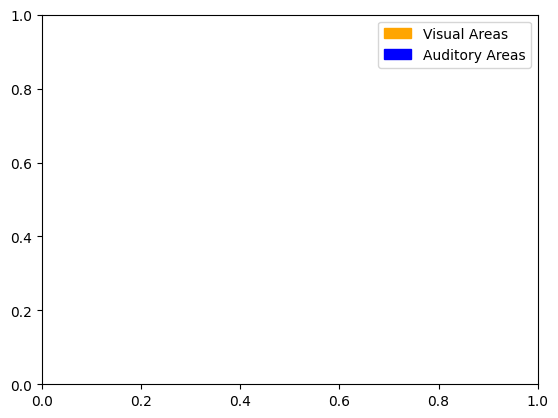

In [31]:

from mne.datasets import sample
from mne.viz import plot_alignment
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the significant regions for visual and auditory modalities
visual_areas = ['inferiortemporal-lh', 'precentral-lh']
auditory_areas = []

# Load the sample subject
subjects_dir = sample.data_path() / "subjects"
subject = 'sample'
trans = 'fsaverage'  # Assuming 'fsaverage' transformation

# Fetch fsaverage (you might not need this if you already have the data)
mne.datasets.fetch_fsaverage(subjects_dir=subjects_dir, verbose=True)

# Create a brain model plot
fig = plot_alignment(subject=subject, subjects_dir=subjects_dir, surfaces=['pial'], coord_frame='mri', trans=trans, show_axes=True)

# Print available labels for debugging
labels = mne.read_labels_from_annot(subject, parc='aparc.a2009s', subjects_dir=subjects_dir)
print("Available labels:", [label.name for label in labels])

# Add the visual areas in orange
for area in visual_areas:
    label_list = [label for label in labels if label.name == area]
    if label_list:
        coords = label_list[0].pos  # For cortical structures
        mne.viz.plot_markers(fig, coords, color='orange')
    else:
        print(f"Label {area} not found in available labels")

# Add a key to the plot
orange_patch = mpatches.Patch(color='orange', label='Visual Areas')
blue_patch = mpatches.Patch(color='blue', label='Auditory Areas')
plt.legend(handles=[orange_patch, blue_patch])

# Show the plot
plt.show()



In [32]:
!pip3 install nilearn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=2794) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [33]:
!mamba install nilearn 


Looking for: ['nilearn']

conda-forge/osx-64                                          Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.9.*


Transaction

  Prefix: /usr/local/Caskroom/mambaforge/base/envs/llm

  All requested packages already installed



In [34]:
import nilearn
from nilearn import plotting, datasets

# Load the MNI152 template
mni152 = datasets.load_mni152_template()

# Define coordinates for subcortical structures (example coordinates, adjust as needed)
amygdala_coords = [(27, -3, -22), (-27, -3, -22)]
hippocampus_coords = [(24, -10, -18), (-24, -10, -18)]

# Create a plot for subcortical structures
fig_subcortical = plotting.plot_glass_brain(mni152, display_mode='lyrz', colorbar=True)

# Add the subcortical structures
for coord in amygdala_coords:
    plotting.plot_markers([coord], color='blue', marker='o', s=50, axes=fig_subcortical.axes)

for coord in hippocampus_coords:
    plotting.plot_markers([coord], color='green', marker='o', s=50, axes=fig_subcortical.axes)

# Add a key to the plot
blue_patch = mpatches.Patch(color='blue', label='Amygdala')
green_patch = mpatches.Patch(color='green', label='Hippocampus')
plt.legend(handles=[blue_patch, green_patch])

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'nilearn'

In [35]:
!pip3 show nilearn

Name: nilearn
Version: 0.10.4
Summary: Statistical learning for neuroimaging in Python
Home-page: 
Author: Nilearn developers
Author-email: 
License: new BSD
Location: /usr/local/Caskroom/mambaforge/base/envs/llm/lib/python3.9/site-packages
Requires: joblib, lxml, nibabel, numpy, packaging, pandas, requests, scikit-learn, scipy
Required-by: 


In [36]:
!mamba list nilearn

# packages in environment at /usr/local/Caskroom/mambaforge/base/envs/llm:
#
# Name                    Version                   Build  Channel
nilearn                   0.10.4             pyhd8ed1ab_0    conda-forge
